In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
ds = pd.read_csv('trainparodly.csv')

In [6]:
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
features = ["GrLivArea" , "BedroomAbvGr" ,"FullBath"]

In [8]:
features

['GrLivArea', 'BedroomAbvGr', 'FullBath']

In [9]:
x = ds [features]

In [10]:
y = ds ["SalePrice"]

In [11]:
x_train,x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train , y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [16]:
 mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(x_test, y_test)

In [17]:
accuracy

0.6341189942328371

In [18]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Accuracy Score:", accuracy)


Mean Squared Error: 2806426667.247853
R-squared: 0.6341189942328371
Accuracy Score: 0.6341189942328371


In [19]:
# Plotting
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Prices')

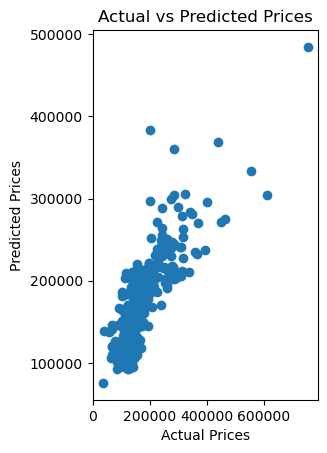

In [20]:
# Plotting actual vs predicted prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

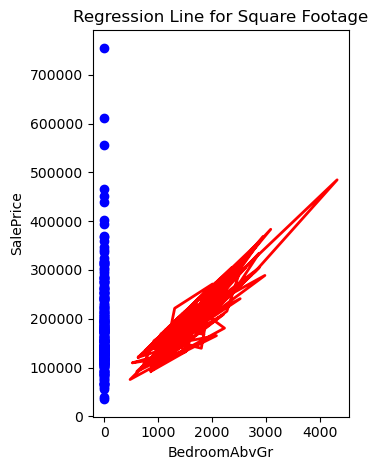

In [24]:
# Plotting the regression line for one feature (sq_ft) while keeping other features constant
plt.subplot(1, 2, 2)
plt.scatter(x_test['FullBath'], y_test, color='blue')
plt.plot(x_test["GrLivArea"], model.predict(x_test), color='red', linewidth=2)
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.title('Regression Line for Square Footage')
plt.tight_layout()
plt.show()

In [26]:
new_data = pd.DataFrame ({'GrLivArea':[2000] , 'BedroomAbvGr' : [3] ,'FullBath' :[2]})
predicted_price = model.predict(new_data)
print (f'Predicted Price : {predicted_price[0]}')

Predicted Price : 240377.51479736285
